In [1]:
import wandb
import numpy as np 
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats

api = wandb.Api(timeout=19)

In [2]:
sweep_map = {
    'o9o3nm8g': 'GNN_only',
    '8k2jlld2': 'Hist',
    'oou7ntmu': 'ResNet18@ImageNet_Final',
    'lx8186qq': 'ResNet18@NWPU-RESISC45_Final',
    'm6xjhx9d': 'ResNet50@ImageNet_Final',
    '2syoa448': 'ResNet50@NWPU-RESISC45_Final' 
}

sweep_name_map_id = { 
    'GNN_only': 'GNN',
    'Hist': 'Hist',
    'ResNet18@ImageNet_Final': 'RN18@IN',
    'ResNet18@NWPU-RESISC45_Final': 'RN18@RS',
    'ResNet50@ImageNet_Final': 'RN50@IN',
    'ResNet50@NWPU-RESISC45_Final': 'RN50@RS',
}

In [4]:
run = wandb.init()
sweeps_data = []

# For each sweep
for k,v in sweep_map.items():
    sweep_data = []
    print(f'Now processing sweep {k}: {v}')

    # For each run in sweep
    experiment_id = 0
    for sweep_run in tqdm(api.sweep('ostromann/gcpr22/' + k).runs):
        artifact = run.use_artifact('ostromann/gcpr22/' + sweep_run.name +'-test_stats:latest', type='experiment-stats')

        artifact_dir = artifact.download()
        path = artifact.get_path('test_stats.csv')
        
        df = pd.read_csv(path.download(), sep='; ')

        series = df.tail(1)
        series['sweep_id'] = k
        series['sweep_name'] = v
        series['experiment_id'] = experiment_id
        experiment_id += 1
        series['model_id'] = sweep_name_map_id[v]
        series['run_name'] = sweep_run.name
        sweep_data.append(series)

    sweep_df = pd.concat(sweep_data)
    sweep_df.reset_index(inplace=True)
    sweep_df = sweep_df.drop('index', axis=1)
    sweeps_data.append(sweep_df)
sweeps_df = pd.concat(sweeps_data)
sweeps_df

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ostromann (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Now processing sweep o9o3nm8g: GNN_only


  0%|          | 0/30 [00:00<?, ?it/s]/proj/berzelius_pilot/users/x_olist/miniconda3/envs/pyg/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/proj/berzelius_pilot/users/x_olist/miniconda3/envs/pyg/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/proj/berzelius_pilot/users/x_olist/miniconda3/envs/pyg/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Now processing sweep 8k2jlld2: Hist


100%|██████████| 30/30 [00:31<00:00,  1.05s/it]


Now processing sweep oou7ntmu: ResNet18@ImageNet_Final


100%|██████████| 30/30 [00:34<00:00,  1.15s/it]


Now processing sweep lx8186qq: ResNet18@NWPU-RESISC45_Final


100%|██████████| 30/30 [00:32<00:00,  1.10s/it]


Now processing sweep m6xjhx9d: ResNet50@ImageNet_Final


100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


Now processing sweep 2syoa448: ResNet50@NWPU-RESISC45_Final


100%|██████████| 30/30 [00:32<00:00,  1.10s/it]


,epoch,train_loss,val_loss,test_loss,train_acc,val_acc,test_acc,best_epoch,test_acc_at_best_epoch,sweep_id,sweep_name,experiment_id,model_id,run_name
0,199,4.1049,72.4858,70.1270,0.732,0.615,0.614,181,0.620,o9o3nm8g,GNN_only,0,GNN,neat-sweep-30
1,199,4.0118,72.4563,76.5993,0.744,0.624,0.615,150,0.598,o9o3nm8g,GNN_only,1,GNN,rose-sweep-29
2,199,4.0766,86.4244,73.5461,0.744,0.616,0.615,168,0.632,o9o3nm8g,GNN_only,2,GNN,dashing-sweep-29
3,199,4.1013,72.9492,72.6086,0.732,0.618,0.599,182,0.610,o9o3nm8g,GNN_only,3,GNN,still-sweep-28
4,199,4.0672,78.3135,64.4729,0.745,0.614,0.641,137,0.630,o9o3nm8g,GNN_only,4,GNN,eternal-sweep-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,199,0.2495,66.0078,53.9577,0.994,0.755,0.753,171,0.748,2syoa448,ResNet50@NWPU-RESISC45_Final,25,RN50@RS,warm-sweep-5
26,199,3.7257,135.9961,101.3726,0.852,0.624,0.648,154,0.748,2syoa448,ResNet50@NWPU-RESISC45_Final,26,RN50@RS,solar-sweep-4
27,199,0.3390,61.5019,58.0815,0.991,0.721,0.739,186,0.752,2syoa448,ResNet50@NWPU-RESISC45_Final,27,RN50@RS,bumbling-sweep-3
28,199,0.3802,52.8411,49.3231,0.991,0.757,0.749,199,0.749,2syoa448,ResNet50@NWPU-RESISC45_Final,28,RN50@RS,still-sweep-2


# Create Boxplots

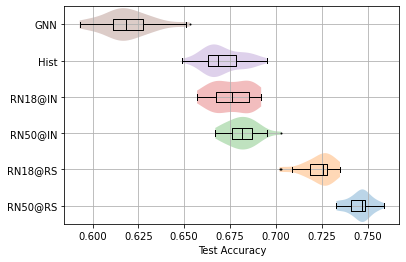

In [6]:
my_df = sweeps_df[['test_acc_at_best_epoch', 'model_id', 'experiment_id']]
plt.rcParams["figure.dpi"] = 300

fig, ax = plt.subplots()

columns_my_order = ['GNN', 'Hist', 'RN18@IN', 'RN50@IN', 'RN18@RS', 'RN50@RS']

medianprops = dict(linestyle='-', linewidth=1.0, color='black')
flierprops = dict( marker='.', ms=2)
vert = False

if vert == True:
    for position, m_id in enumerate(columns_my_order):
        ax.boxplot(my_df[my_df['model_id'] == m_id]['test_acc_at_best_epoch'], positions=[position], flierprops=flierprops, medianprops=medianprops)
        ax.violinplot(my_df[my_df['model_id'] == m_id]['test_acc_at_best_epoch'], positions=[position], showextrema=False)

    ax.set_xticks(range(position+1))
    ax.set_xticklabels(columns_my_order)
    ax.set_xlim(xmin=-0.5)
    ax.grid(which='major')
    plt.show()
else:
    columns_my_order.reverse()
    for position, m_id in enumerate(columns_my_order):
        ax.boxplot(my_df[my_df['model_id'] == m_id]['test_acc_at_best_epoch'], positions=[position], flierprops=flierprops, medianprops=medianprops, vert=False, widths=0.3)
        ax.violinplot(my_df[my_df['model_id'] == m_id]['test_acc_at_best_epoch'], positions=[position], showextrema=False, vert=False, widths=0.9, showmedians=False)

    ax.set_yticks(range(position+1))
    ax.set_yticklabels(columns_my_order)
    ax.set_ylim(ymin=-0.5)
    ax.grid(which='major')
    ax.set_xlabel('Test Accuracy')
    plt.show()

# Superiority / Non-Inferiority Testing

In [20]:
a = my_df[my_df['model_id'] == 'RN18@IN']['test_acc_at_best_epoch']
b = my_df[my_df['model_id'] == 'RN18@RS']['test_acc_at_best_epoch']

models = ['GNN', 'Hist', 'RN18@IN', 'RN50@IN', 'RN18@RS', 'RN50@RS']

p_threshold = 0.05
equal_var = False

str_eq_table = np.empty([len(models), len(models)], dtype="S2")
str_sup_table = np.empty([len(models), len(models)], dtype="S2")

eq_table = np.empty([len(models), len(models)])
sup_table = np.empty([len(models), len(models)])

# Equality Testing
print('Equality')
for i, model_a in enumerate(models):
    for j, model_b in enumerate(models):
        
        a = my_df[my_df['model_id'] == model_a]['test_acc_at_best_epoch']
        b = my_df[my_df['model_id'] == model_b]['test_acc_at_best_epoch']

        eq = stats.ttest_ind(a,b,equal_var=equal_var,alternative='two-sided').pvalue
        eq_t = '!=' if eq < p_threshold else '='
        str_eq_table[i][j] = eq_t
        sup_table[i][j] = eq
        print(f'{model_a} {eq:.5f} {model_b}')



# Superiority Testing
print('Superiority')
for i, model_a in enumerate(models):
    for j, model_b in enumerate(models):
        
        a = my_df[my_df['model_id'] == model_a]['test_acc_at_best_epoch']
        b = my_df[my_df['model_id'] == model_b]['test_acc_at_best_epoch']

        # if i > j:
        sup = stats.ttest_ind(a,b,equal_var=equal_var,alternative='greater').pvalue
        sup_t = '>' if sup < p_threshold else '?<='
        str_sup_table[i][j] = sup_t
        sup_table[i][j] = sup
        print(f'{model_a} {sup:.5f} {model_b}')     



Equality
GNN 1.00000 GNN
GNN 0.00000 Hist
GNN 0.00000 RN18@IN
GNN 0.00000 RN50@IN
GNN 0.00000 RN18@RS
GNN 0.00000 RN50@RS
Hist 0.00000 GNN
Hist 1.00000 Hist
Hist 0.10283 RN18@IN
Hist 0.00008 RN50@IN
Hist 0.00000 RN18@RS
Hist 0.00000 RN50@RS
RN18@IN 0.00000 GNN
RN18@IN 0.10283 Hist
RN18@IN 1.00000 RN18@IN
RN18@IN 0.01435 RN50@IN
RN18@IN 0.00000 RN18@RS
RN18@IN 0.00000 RN50@RS
RN50@IN 0.00000 GNN
RN50@IN 0.00008 Hist
RN50@IN 0.01435 RN18@IN
RN50@IN 1.00000 RN50@IN
RN50@IN 0.00000 RN18@RS
RN50@IN 0.00000 RN50@RS
RN18@RS 0.00000 GNN
RN18@RS 0.00000 Hist
RN18@RS 0.00000 RN18@IN
RN18@RS 0.00000 RN50@IN
RN18@RS 1.00000 RN18@RS
RN18@RS 0.00000 RN50@RS
RN50@RS 0.00000 GNN
RN50@RS 0.00000 Hist
RN50@RS 0.00000 RN18@IN
RN50@RS 0.00000 RN50@IN
RN50@RS 0.00000 RN18@RS
RN50@RS 1.00000 RN50@RS
Superiority
GNN 0.50000 GNN
GNN 1.00000 Hist
GNN 1.00000 RN18@IN
GNN 1.00000 RN50@IN
GNN 1.00000 RN18@RS
GNN 1.00000 RN50@RS
Hist 0.00000 GNN
Hist 0.50000 Hist
Hist 0.94859 RN18@IN
Hist 0.99996 RN50@IN
Hist 1.00

In [21]:
print('\nEquivalence Test')
print(str_eq_table)

print('\nSuperiority Test')
print(str_sup_table)


Equivalence Test
[[b'=' b'!=' b'!=' b'!=' b'!=' b'!=']
 [b'!=' b'=' b'=' b'!=' b'!=' b'!=']
 [b'!=' b'=' b'=' b'!=' b'!=' b'!=']
 [b'!=' b'!=' b'!=' b'=' b'!=' b'!=']
 [b'!=' b'!=' b'!=' b'!=' b'=' b'!=']
 [b'!=' b'!=' b'!=' b'!=' b'!=' b'=']]

Superiority Test
[[b'?<' b'?<' b'?<' b'?<' b'?<' b'?<']
 [b'>' b'?<' b'?<' b'?<' b'?<' b'?<']
 [b'>' b'?<' b'?<' b'?<' b'?<' b'?<']
 [b'>' b'>' b'>' b'?<' b'?<' b'?<']
 [b'>' b'>' b'>' b'>' b'?<' b'?<']
 [b'>' b'>' b'>' b'>' b'>' b'?<']]

Inferiority Test
[[b'?<' b'?<' b'?<' b'?<' b'?<' b'?<']
 [b'>' b'?<' b'?<' b'?<' b'?<' b'?<']
 [b'>' b'?<' b'?<' b'?<' b'?<' b'?<']
 [b'>' b'>' b'>' b'?<' b'?<' b'?<']
 [b'>' b'>' b'>' b'>' b'?<' b'?<']
 [b'>' b'>' b'>' b'>' b'>' b'?<']]


In [97]:
print('\nEquivalence Test')
print(eq_table)

print('\nSuperiority Test')
print(sup_table)


Superiority Test
[[4.63557317e-310 0.00000000e+000 0.00000000e+000 0.00000000e+000
  6.79038653e-313 1.16097020e-028]
 [1.35725816e-022 2.92732915e-028 7.48538580e-067 1.04917183e-153
  5.23081515e-143 7.71484858e-043]
 [2.84779665e-024 5.14140819e-002 7.80035532e-043 7.48929242e-144
  3.59751658e+252 1.46901661e+179]
 [1.02321717e-025 4.09596161e-005 7.17662050e-003 6.24016886e-042
  6.58082623e-066 7.78837688e-091]
 [1.48490465e-035 4.51948356e-028 3.56462335e-027 2.70602571e-027
  6.64318003e-066 2.32716490e-057]
 [1.49198705e-036 1.81413318e-034 1.04366538e-034 1.82679294e-038
  1.98777987e-016 1.58718589e-319]]

Inferiority Test
[[0.00000000e+000 1.35725816e-022 2.84779665e-024 1.02321717e-025
  1.48490465e-035 1.49198705e-036]
 [1.26071127e-076 2.92732915e-028 5.14140819e-002 4.09596161e-005
  4.51948356e-028 1.81413318e-034]
 [1.79150595e+160 2.17428906e-076 7.91843539e+165 7.17662050e-003
  3.56462335e-027 1.04366538e-034]
 [8.37404147e+242 4.31999013e-096 4.82337723e+228 6.24